In [1]:
import re
import pandas as pd

In [2]:
f = open("WhatsApp Chat with KCC_SW_2027 Batch.txt",'r',encoding='utf-8')

In [3]:
data = f.read()

In [4]:
print(data)

20/08/24, 19:53 - Messages and calls are end-to-end encrypted. Only people in this chat can read, listen to, or share them. Learn more.
20/08/24, 21:59 - Keshav Kcc: How the FME Examination??
20/08/24, 21:59 - Keshav Kcc: And PPS Examination??
20/08/24, 22:00 - Keshav Kcc: I think FME mai sab pass ho Jane chaiye , fully theoretical tha exam .
20/08/24, 22:01 - Keshav Kcc: PPS Program based tha , Those who work on Programming must get good marks
20/08/24, 22:01 - Keshav Kcc: <Media omitted>
20/08/24, 22:03 - Keshav Kcc: On 16 or 17th B.tech 1st year orientation as well .
20/08/24, 22:07 - Keshav Kcc: U r last exam on 22 , so easy subject EVS and Soft skill .

Don't ask help of this Subjects Bhai 🙏🏼👏

Padh lo , previous year paper .
20/08/24, 22:10 - Keshav Kcc: After Exam Take Semester Break , Will open on expectedly after 25 September  ( Expected not sure ) , notice u will get . <This message was edited>
20/08/24, 22:11 - Keshav Kcc: And Yes , Do Internship as well in these days . 

We

In [5]:
import re
from datetime import datetime
def convert_time(match):
    date_str, time_str = match.groups()
    dt = datetime.strptime(f"{date_str} {time_str}", "%d/%m/%y %I:%M %p")
    return dt.strftime("%d/%m/%y, %H:%M - ")

# text = "20/08/24, 12:54 pm - Message edited"
# pattern = r'(\d{1,2}/\d{1,2}/\d{2,4}),\s(\d{1,2}:\d{2}\s[ap]m) -'
# new_text = re.sub(pattern, convert_time, text)
# print(new_text)

In [6]:
pattern = r'\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s'
messages = re.split(pattern,data)[1:]
len(messages)

1447

In [7]:
dates = re.findall(pattern,data)
dates

['20/08/24, 19:53 - ',
 '20/08/24, 21:59 - ',
 '20/08/24, 21:59 - ',
 '20/08/24, 22:00 - ',
 '20/08/24, 22:01 - ',
 '20/08/24, 22:01 - ',
 '20/08/24, 22:03 - ',
 '20/08/24, 22:07 - ',
 '20/08/24, 22:10 - ',
 '20/08/24, 22:11 - ',
 '20/08/24, 22:11 - ',
 '20/08/24, 22:12 - ',
 '20/08/24, 22:12 - ',
 '20/08/24, 22:18 - ',
 '20/08/24, 22:22 - ',
 '20/08/24, 22:22 - ',
 '20/08/24, 22:26 - ',
 '20/08/24, 22:28 - ',
 '20/08/24, 22:30 - ',
 '20/08/24, 22:31 - ',
 '20/08/24, 22:38 - ',
 '21/08/24, 06:54 - ',
 '21/08/24, 06:54 - ',
 '21/08/24, 06:54 - ',
 '21/08/24, 20:04 - ',
 '21/08/24, 22:25 - ',
 '21/08/24, 22:28 - ',
 '21/08/24, 22:31 - ',
 '21/08/24, 22:31 - ',
 '21/08/24, 22:33 - ',
 '21/08/24, 22:33 - ',
 '21/08/24, 22:37 - ',
 '21/08/24, 22:39 - ',
 '21/08/24, 22:41 - ',
 '21/08/24, 22:42 - ',
 '21/08/24, 22:43 - ',
 '22/08/24, 21:21 - ',
 '22/08/24, 21:22 - ',
 '22/08/24, 21:25 - ',
 '22/08/24, 21:25 - ',
 '22/08/24, 21:25 - ',
 '22/08/24, 21:27 - ',
 '22/08/24, 21:28 - ',
 '22/08/24,

In [8]:
df = pd.DataFrame({'user_message':messages,'message_date':dates})
df['message_date'] = pd.to_datetime(df['message_date'],format='%d/%m/%y, %H:%M - ')
df.rename(columns={'message_date':'date'},inplace=True)
df.head()

,user_message,date
0,Messages and calls are end-to-end encrypted. O...,2024-08-20 19:53:00
1,Keshav Kcc: How the FME Examination??\n,2024-08-20 21:59:00
2,Keshav Kcc: And PPS Examination??\n,2024-08-20 21:59:00
3,Keshav Kcc: I think FME mai sab pass ho Jane c...,2024-08-20 22:00:00
4,"Keshav Kcc: PPS Program based tha , Those who ...",2024-08-20 22:01:00


In [9]:
df.shape

(1447, 2)

In [10]:
users = []
messages = []
for message in df['user_message']:
    entry = re.split(r'([\w\W]+?):\s',message)
    if entry[1:]:
        users.append(entry[1])
        messages.append(entry[2])
    else:
        users.append('group_notification')
        messages.append(entry[0])

df['user'] = users
df['message'] = messages
df.drop(columns=['user_message'],inplace=True)
df.head()

,date,user,message
0,2024-08-20 19:53:00,group_notification,Messages and calls are end-to-end encrypted. O...
1,2024-08-20 21:59:00,Keshav Kcc,How the FME Examination??\n
2,2024-08-20 21:59:00,Keshav Kcc,And PPS Examination??\n
3,2024-08-20 22:00:00,Keshav Kcc,"I think FME mai sab pass ho Jane chaiye , full..."
4,2024-08-20 22:01:00,Keshav Kcc,"PPS Program based tha , Those who work on Prog..."


In [11]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month_name()
df['day'] = df['date'].dt.day
df['hour'] = df['date'].dt.hour
df['minute'] = df['date'].dt.minute
df.head()

,date,user,message,year,month,day,hour,minute
0,2024-08-20 19:53:00,group_notification,Messages and calls are end-to-end encrypted. O...,2024,August,20,19,53
1,2024-08-20 21:59:00,Keshav Kcc,How the FME Examination??\n,2024,August,20,21,59
2,2024-08-20 21:59:00,Keshav Kcc,And PPS Examination??\n,2024,August,20,21,59
3,2024-08-20 22:00:00,Keshav Kcc,"I think FME mai sab pass ho Jane chaiye , full...",2024,August,20,22,0
4,2024-08-20 22:01:00,Keshav Kcc,"PPS Program based tha , Those who work on Prog...",2024,August,20,22,1


In [12]:
words = []
for message in df['message']:
    words.extend(message.split())
len(words)

26023

In [13]:
text = "Visit https://openai.com and http://example.org or www.google.com"
links = re.findall(r'\b((?:https?|ftp)://|www\.)[^\s/$.?#].[^\s]*', text)
print(links)

['https://', 'http://', 'www.']


In [14]:
links = re.findall(r'\b((?:https?|ftp)://[^\s]+|(?:www\.)?[a-zA-Z0-9-]+\.[a-zA-Z]{2,})\b', text)
print(links)

['https://openai.com', 'http://example.org', 'www.google.com']


In [15]:
import re

pattern = r'(?i)\b((?:https?|ftp)://[^\s]+|(?:www\.)?[a-zA-Z0-9-]+\.(?!tech\b)[a-zA-Z]{2,})\b'

links = []
for msg in df['message']:
    links.extend(re.findall(pattern, msg))
links

['https://bharatintern.live/services-5',
 'https://www.hackerrank.com',
 'https://digilocker.meripehchaan.gov.in/signin/oauth_partner/%252Foauth2%252F1%252Fconsent%253Flogo%253D%2526amr%253Dpan%252Bdriving_licence%252Baadhaar%2526response_type%253Dcode%2526client_id%253D08627FE5%2526state%253D102%2526redirect_uri%253Dhttps%25253A%25252F%25252Fabc.digilocker.gov.in%25252Fsignup%25252Fcallback_data%2526scope%253Dopenid%252Bpicture%2526orgid%253D002585%2526txn%253D66a3507431ed1oauth21721978996%2526hashkey%253D14db3a4772919969184daa3751909875070e2ba191d2e7bb443ae43e17ee4dd0%2526requst_pdf%253DY%2526app_name%253DQWNhZGVtaWMgQmFuayBvZiBDcmVkaXRz%2526signup%253Dsignup',
 'https://www.sih.gov.in/sih2024PS',
 'https://www.sih.gov.in',
 'https://www.youtube.com/watch?v=rL8MgOj7kKw',
 'https://forms.gle/KQGRCAHsrd9gJyfz9',
 'https://www.linkedin.com/posts/keshav-kumar-jha-1b7027114_upgov-digishakti-btech-activity-7235685329217732608-YkLf?utm_source=share&utm_medium=member_android',
 'https://code

In [16]:
df

,date,user,message,year,month,day,hour,minute
0,2024-08-20 19:53:00,group_notification,Messages and calls are end-to-end encrypted. O...,2024,August,20,19,53
1,2024-08-20 21:59:00,Keshav Kcc,How the FME Examination??\n,2024,August,20,21,59
2,2024-08-20 21:59:00,Keshav Kcc,And PPS Examination??\n,2024,August,20,21,59
3,2024-08-20 22:00:00,Keshav Kcc,"I think FME mai sab pass ho Jane chaiye , full...",2024,August,20,22,0
4,2024-08-20 22:01:00,Keshav Kcc,"PPS Program based tha , Those who work on Prog...",2024,August,20,22,1
...,...,...,...,...,...,...,...,...
1442,2026-01-20 18:29:00,Keshav Kcc,"Sir ,Please share this form with students.\n",2026,January,20,18,29
1443,2026-01-20 18:31:00,Keshav Kcc,Connect 9875494026 (Ashish Soni) \n\nIf any Qu...,2026,January,20,18,31
1444,2026-01-22 21:59:00,Keshav Kcc,<Media omitted>\n,2026,January,22,21,59
1445,2026-01-24 08:11:00,Keshav Kcc,<Media omitted>\n,2026,January,24,8,11


<BarContainer object of 2 artists>

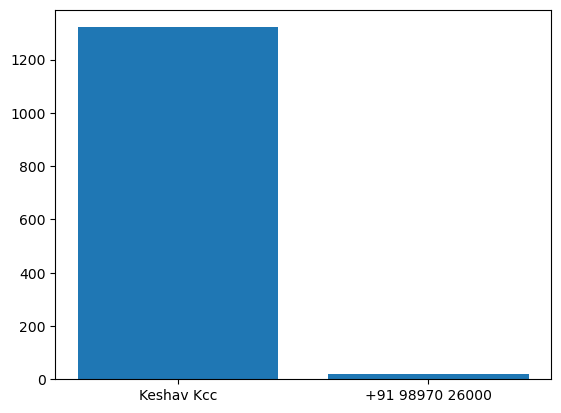

In [17]:
import matplotlib.pyplot as plt
df =df[df['user'] != 'group_notification']
x = df['user'].value_counts().head()

name = x.index
count = x.values
plt.bar(name,count)

In [18]:
round((df['user'].value_counts()/df.shape[0])*100,2).reset_index().rename(columns={'user':'name','count':'percent'})

,name,percent
0,Keshav Kcc,98.66
1,+91 98970 26000,1.34


In [19]:
from collections import Counter
pd.DataFrame(Counter(words).most_common(20))

,0,1
0,and,571
1,to,528
2,the,464
3,",",385
4,.,383
5,<Media,339
6,omitted>,339
7,in,338
8,for,292
9,of,252


In [20]:
df = df[df['message'] != '<Media omitted>\n']
df

,date,user,message,year,month,day,hour,minute
1,2024-08-20 21:59:00,Keshav Kcc,How the FME Examination??\n,2024,August,20,21,59
2,2024-08-20 21:59:00,Keshav Kcc,And PPS Examination??\n,2024,August,20,21,59
3,2024-08-20 22:00:00,Keshav Kcc,"I think FME mai sab pass ho Jane chaiye , full...",2024,August,20,22,0
4,2024-08-20 22:01:00,Keshav Kcc,"PPS Program based tha , Those who work on Prog...",2024,August,20,22,1
6,2024-08-20 22:03:00,Keshav Kcc,On 16 or 17th B.tech 1st year orientation as w...,2024,August,20,22,3
...,...,...,...,...,...,...,...,...
1440,2026-01-20 18:29:00,Keshav Kcc,,2026,January,20,18,29
1441,2026-01-20 18:29:00,Keshav Kcc,https://docs.google.com/forms/d/1dEg-ePfllH2z0...,2026,January,20,18,29
1442,2026-01-20 18:29:00,Keshav Kcc,"Sir ,Please share this form with students.\n",2026,January,20,18,29
1443,2026-01-20 18:31:00,Keshav Kcc,Connect 9875494026 (Ashish Soni) \n\nIf any Qu...,2026,January,20,18,31


In [21]:
f = open('stop_hinglish.txt','r')
stop_words = f.read()
print(stop_words)

.
..
...
?
-
--
1
2
3
4
5
6
7
8
9
0
a
aadi
aaj
aap
aapne
aata
aati
aaya
aaye
ab
abbe
abbey
abe
abhi
able
about
above
accha
according
accordingly
acha
achcha
across
actually
after
afterwards
again
against
agar
ain
aint
ain't
aisa
aise
aisi
alag
all
allow
allows
almost
alone
along
already
also
although
always
am
among
amongst
an
and
andar
another
any
anybody
anyhow
anyone
anything
anyway
anyways
anywhere
ap
apan
apart
apna
apnaa
apne
apni
appear
are
aren
arent
aren't
around
arre
as
aside
ask
asking
at
aur
avum
aya
aye
baad
baar
bad
bahut
bana
banae
banai
banao
banaya
banaye
banayi
banda
bande
bandi
bane
bani
bas
bata
batao
bc
be
became
because
become
becomes
becoming
been
before
beforehand
behind
being
below
beside
besides
best
better
between
beyond
bhai
bheetar
bhi
bhitar
bht
bilkul
bohot
bol
bola
bole
boli
bolo
bolta
bolte
bolti
both
brief
bro
btw
but
by
came
can
cannot
cant
can't
cause
causes
certain
certainly
chahiye
chaiye
chal
chalega
chhaiye
clearly
c'mon
com
come
comes
could
coul

In [22]:
words = []
for message in df['message']:
    for word in message.lower().split():
        if word not in stop_words:
            words.append(word)

words

['fme',
 'examination??',
 'pps',
 'examination??',
 'fme',
 'pass',
 'jane',
 ',',
 'theoretical',
 'pps',
 'program',
 'based',
 ',',
 'work',
 'programming',
 'marks',
 '16',
 '17th',
 'b.tech',
 '1st',
 'year',
 'orientation',
 '22',
 ',',
 'easy',
 'subject',
 'evs',
 'soft',
 'skill',
 'subjects',
 '🙏🏼👏',
 'padh',
 ',',
 'previous',
 'year',
 'paper',
 'semester',
 'break',
 ',',
 'open',
 'expectedly',
 '25',
 'september',
 '(',
 'expected',
 ')',
 ',',
 'notice',
 '<this',
 'message',
 'edited>',
 ',',
 'internship',
 'days',
 'utilize',
 'break',
 'productive',
 'work',
 'well.',
 'message',
 'deleted',
 'intrested',
 'students',
 'only.',
 '25',
 'sept',
 'told',
 ',',
 'make',
 'linkedin',
 'profile',
 'created',
 'active',
 'linkedin',
 'profile',
 'minimum',
 '1k',
 'follower',
 'note',
 'it.',
 'https://bharatintern.live/services-5/',
 'bharat',
 'intern',
 'avilable',
 'nptel/shyam',
 'certification',
 'programming',
 'languages.',
 'important',
 'start',
 'coding',
 'ha

In [24]:
!pip install emoji

In [27]:
import emoji
emojis = []
for message in df['message']:
    emojis.extend([c for c in message if c in emoji.EMOJI_DATA])

emojis = pd.DataFrame(Counter(emojis).most_common(len(Counter(emojis))))

In [28]:
emojis

,0,1
0,👍,34
1,🔴,19
2,▶,12
3,🙏,6
4,💐,6
5,🛑,5
6,👆,4
7,🥳,3
8,📢,3
9,👇,3


In [29]:
df['month_num'] = df['date'].dt.month
df

,date,user,message,year,month,day,hour,minute,month_num
1,2024-08-20 21:59:00,Keshav Kcc,How the FME Examination??\n,2024,August,20,21,59,8
2,2024-08-20 21:59:00,Keshav Kcc,And PPS Examination??\n,2024,August,20,21,59,8
3,2024-08-20 22:00:00,Keshav Kcc,"I think FME mai sab pass ho Jane chaiye , full...",2024,August,20,22,0,8
4,2024-08-20 22:01:00,Keshav Kcc,"PPS Program based tha , Those who work on Prog...",2024,August,20,22,1,8
6,2024-08-20 22:03:00,Keshav Kcc,On 16 or 17th B.tech 1st year orientation as w...,2024,August,20,22,3,8
...,...,...,...,...,...,...,...,...,...
1440,2026-01-20 18:29:00,Keshav Kcc,,2026,January,20,18,29,1
1441,2026-01-20 18:29:00,Keshav Kcc,https://docs.google.com/forms/d/1dEg-ePfllH2z0...,2026,January,20,18,29,1
1442,2026-01-20 18:29:00,Keshav Kcc,"Sir ,Please share this form with students.\n",2026,January,20,18,29,1
1443,2026-01-20 18:31:00,Keshav Kcc,Connect 9875494026 (Ashish Soni) \n\nIf any Qu...,2026,January,20,18,31,1


In [31]:
timeline = df.groupby(['year','month_num','month']).count()['message'].reset_index()
timeline

,year,month_num,month,message
0,2024,8,August,83
1,2024,9,September,35
2,2024,10,October,119
3,2024,11,November,96
4,2024,12,December,52
5,2025,1,January,76
6,2025,2,February,39
7,2025,3,March,53
8,2025,4,April,33
9,2025,5,May,51


In [32]:
time = []
for i in range(timeline.shape[0]):
    time.append(timeline['month'][i]+"-"+str(timeline['year'][i]))
timeline['time'] = time
timeline

,year,month_num,month,message,time
0,2024,8,August,83,August-2024
1,2024,9,September,35,September-2024
2,2024,10,October,119,October-2024
3,2024,11,November,96,November-2024
4,2024,12,December,52,December-2024
5,2025,1,January,76,January-2025
6,2025,2,February,39,February-2025
7,2025,3,March,53,March-2025
8,2025,4,April,33,April-2025
9,2025,5,May,51,May-2025


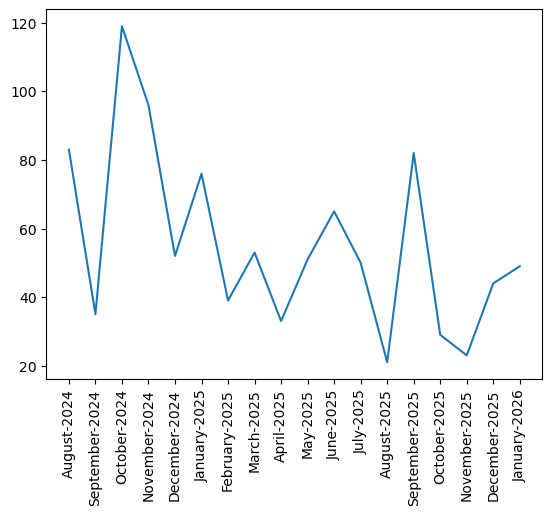

In [34]:
plt.plot(timeline['time'],timeline['message'])
plt.xticks(rotation='vertical')
plt.show()

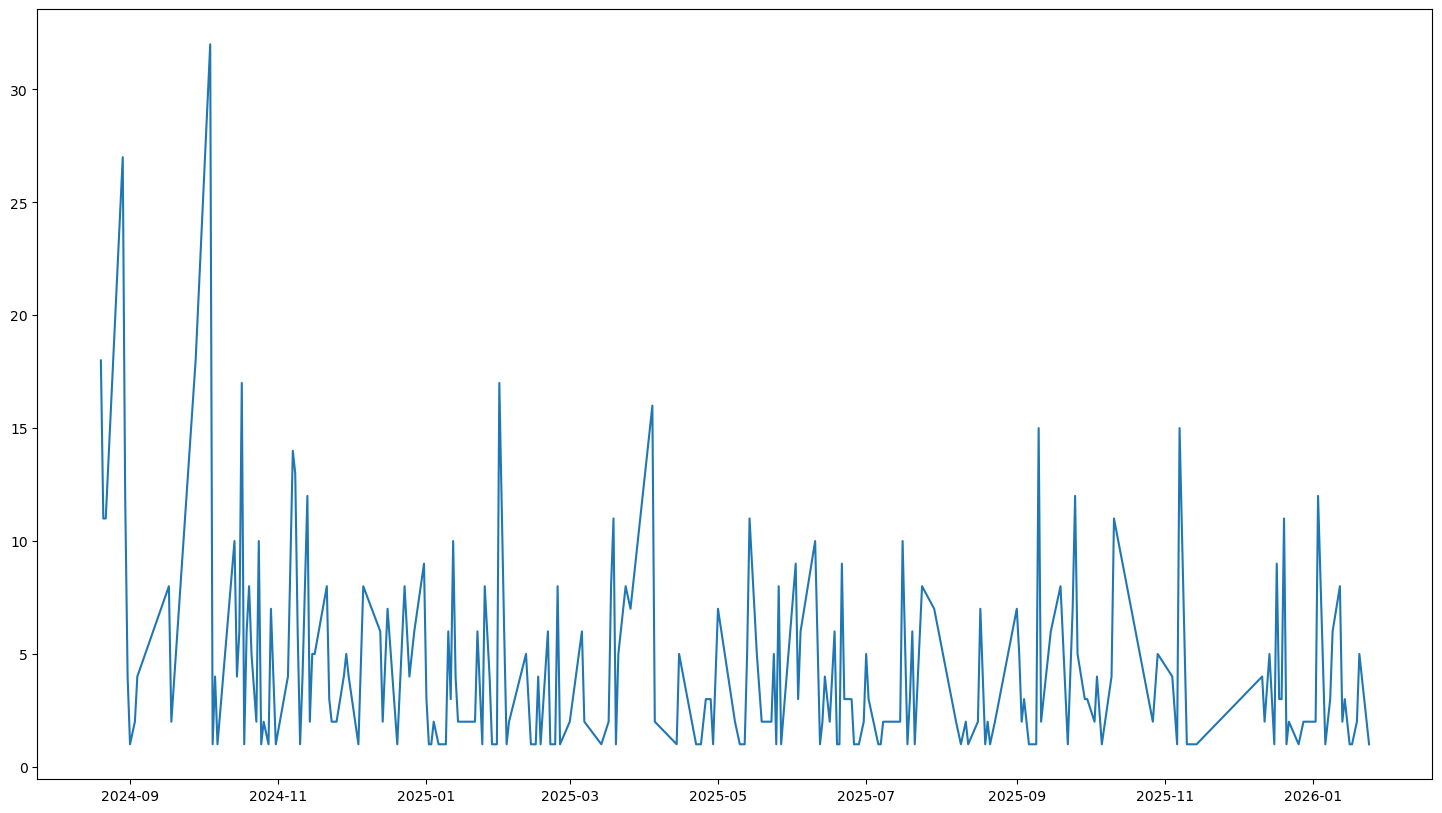

In [36]:
df['only_date'] = df['date'].dt.date
daily_timeline = df.groupby('only_date').count()['message'].reset_index()
plt.figure(figsize=(18,10))
plt.plot(daily_timeline['only_date'],daily_timeline['message'])

In [37]:
df['day_name'] = df['date'].dt.day_name()
df['day_name'].value_counts()

day_name
Friday       202
Thursday     165
Wednesday    151
Saturday     146
Tuesday      140
Monday       133
Sunday        63
Name: count, dtype: int64

In [38]:
period = []
for hour in df[['day_name','hour']]['hour']:
    if hour == 23:
        period.append(str(hour)+"-"+str('00'))
    elif hour == 0:
        period.append(str('00')+"-"+str(hour+1))
    else:
        period.append(str(hour)+"-"+str(hour+1))

In [39]:
df['period'] = period

In [40]:
df.sample(5)

,date,user,message,year,month,day,hour,minute,month_num,only _date,only_date,day_name,period
339,2024-11-07 23:02:00,Keshav Kcc,I think every one must understand the each clu...,2024,November,7,23,2,11,2024-11-07,2024-11-07,Thursday,23-00
1295,2025-11-06 22:17:00,Keshav Kcc,All 3rd-year students are requested to come in...,2025,November,6,22,17,11,2025-11-06,2025-11-06,Thursday,22-23
1206,2025-09-25 21:35:00,Keshav Kcc,,2025,September,25,21,35,9,2025-09-25,2025-09-25,Thursday,21-22
488,2024-12-13 19:59:00,Keshav Kcc,This message was deleted\n,2024,December,13,19,59,12,2024-12-13,2024-12-13,Friday,19-20
1372,2025-12-26 09:08:00,Keshav Kcc,,2025,December,26,9,8,12,2025-12-26,2025-12-26,Friday,9-10


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0, 0.5, 'Friday'),
  Text(0, 1.5, 'Monday'),
  Text(0, 2.5, 'Saturday'),
  Text(0, 3.5, 'Sunday'),
  Text(0, 4.5, 'Thursday'),
  Text(0, 5.5, 'Tuesday'),
  Text(0, 6.5, 'Wednesday')])

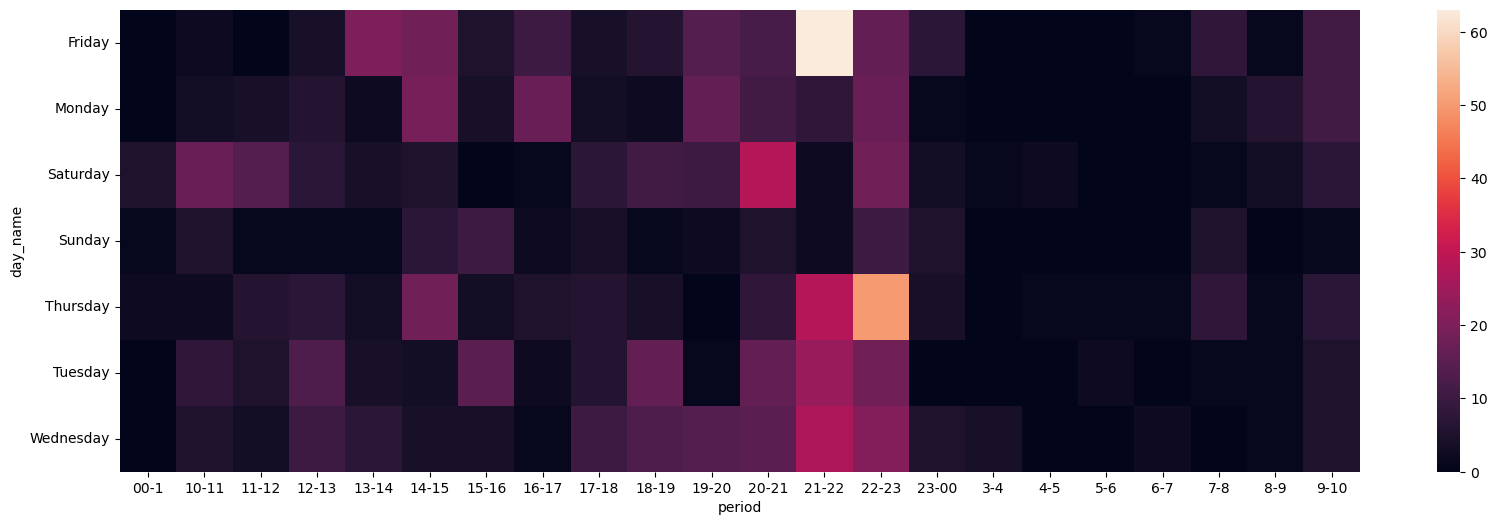

In [45]:
import seaborn as sns
plt.figure(figsize=(20, 6))
sns.heatmap(df.pivot_table(index="day_name",columns='period',values='message',aggfunc='count').fillna(0))
plt.yticks(rotation='horizontal')

In [42]:
!pip install seaborn

In [43]:
import sklearn